<a href="https://colab.research.google.com/github/WekaF/Sentimen-Analisis-Random-Forest/blob/main/Script_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JUDUL

**ANALISIS SENTIMEN MENGGUNAKAN METODE RANDOM FOREST BERDASARKAN OPINI PADA TWITTER TERHADAP KEBIJAKAN NEW NORMAL DI INDONESIA**

> Indented block





---
NAMA : Wahyu Kurnia Febryanto

NIM  : 16650109

NAMA DOSEN PEMBIMBING 1 : Prof. Dr. Suhartono, M.Kom

NAMA DOSEN PEMBIMBING 2 : Roro Inda Melani, S.Kom., M.Sc


**TAHAPAN**


1.   inisiasi library 
2.   Preprocessing
3.   TF-IDF
4.   Metode klasifikasi RANDOM FOREST 
5.   EVALUASI
6.   PENGUJIAN



 


# Import library / initiation

In [ ]:
!pip install sastrawi

In [ ]:
# Import some libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import pydotplus
import warnings
# from google.colab import drive
# drive.mount('/content/drive') 
 
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from IPython.display import Image
from wordcloud import WordCloud
import random
from collections import Counter
from scipy.stats import mode



 
#  SASTRAWI
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve  
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# ***Preprocessing***

In [ ]:
data = pd.read_csv('/content/drive/My Drive/dataskrip/datax.csv')
# data.columns = ['user' ,'id', 'tweet'] 
# data = data[['tweet']]
# tweets = data
data = data[['label','tweet']]
data

,label,tweet
0,negatif,kancaku ngidoh pas lagi nganggo masker asu gob...
1,positif,#twifi pengunjung https://t.co/L0hSMEhr0j corn...
2,positif,Di Rumah Aja!<U+2063>\n<U+2063>\nSebenernya...
3,positif,Ayo hidup sehat di masa #NewNormal #BersamaDIA...
4,positif,Tetap Aman Saat New Normal! <U+0001F60E><U+280...
...,...,...
404,negatif,"i am not against 'new normal'.. cuma, mbok yo ..."
405,negatif,photo dan kata berdamai itu kegedean huruf nya...
406,negatif,My new normal. Quarantine day 2698751234: Udah...
407,negatif,"gak semua peraturan itu kadang masuk di akal, ..."


In [ ]:
data['label'].value_counts()

positif    216
negatif    193
Name: label, dtype: int64

In [ ]:
slang_words = {"wfh":"work from home","Yg":"yang","@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah",
               "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", 
               "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo",
               "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", 
               "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", 
               "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam",
               "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu",
               "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan","blum":"belum","brakhir":"berakhir",
               "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi",
               "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", 
               "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", 
               "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang",
               "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental",
               "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan",
               "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah",
               "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", 
               "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru",
               "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia",
               "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat",
               "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar",
               "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", 
               "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat",
               "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", 
               "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep",
               "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci",
               "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat","qta" :"kita", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
 
data['fix_slang'] = data['tweet'].apply(lambda x: ' '.join(slang_words.get(word, word) for word in x.split()))
data.head()
# tweets.loc[:,['fix_slang']]

,label,tweet,fix_slang
0,negatif,kancaku ngidoh pas lagi nganggo masker asu gob...,kancaku ngidoh pas lagi nganggo masker asu gob...
1,positif,#twifi pengunjung https://t.co/L0hSMEhr0j corn...,#twifi pengunjung https://t.co/L0hSMEhr0j corn...
2,positif,Di Rumah Aja!<U+2063>\n<U+2063>\nSebenernya...,Di Rumah Aja!<U+2063> <U+2063> Sebenernya d...
3,positif,Ayo hidup sehat di masa #NewNormal #BersamaDIA...,Ayo hidup sehat di masa #NewNormal #BersamaDIA...
4,positif,Tetap Aman Saat New Normal! <U+0001F60E><U+280...,Tetap Aman Saat New Normal! <U+0001F60E><U+280...


In [ ]:
# Some functions for preprocessing text
 
def emojiDel(text): #remove emoji
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
 
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text
 
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text
 
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text
 
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text
 
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text
 
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
# Preprocessing tweets data 
 
data['text_clean'] = data['fix_slang'].apply(cleaningText)
data['text_clean'] = data['text_clean'].apply(casefoldingText)
data['text_clean'] = data['text_clean'].apply(emojiDel)
data.drop(['fix_slang'], axis = 1, inplace = True)
 
data['text_preprocessed'] = data['text_clean'].apply(tokenizingText)
data['text_preprocessed'] = data['text_preprocessed'].apply(filteringText)
data['text_preprocessed'] = data['text_preprocessed'].apply(stemmingText)
 
# drop duplicates/spams tweets
import time
data.drop_duplicates(subset = 'text_clean', inplace = True)
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.985664367675781e-05 seconds ---


In [ ]:
# Export to csv file
# data.to_csv(r'/content/drive/My Drive/dataskrip/datacleannew.csv', index = False, header = True,index_label=None)
# data = pd.read_csv('/content/drive/MyDrive/dataskrip/datacleannew.csv')
# tweets.loc[:,['tweet','text_clean','text_preprocessed','emotion']]
data

In [ ]:
# # Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# # Loads lexicon positive and negative data
# lexicon_positive = dict()
# import csv
# with open('/content/drive/My Drive/data/lexicon_positive.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     for row in reader:
#         lexicon_positive[row[0]] = int(row[1])

# lexicon_negative = dict()
# import csv
# with open('/content/drive/My Drive/data/lexicon_negative.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     for row in reader:
#         lexicon_negative[row[0]] = int(row[1])
        
# # Function to determine sentiment polarity of tweets        
# def sentiment_analysis_lexicon_indonesia(text):
#     #for word in text:
#     score = 0
#     for word in text:
#         if (word in lexicon_positive):
#             score = score + lexicon_positive[word]
#     for word in text:
#         if (word in lexicon_negative):
#             score = score + lexicon_negative[word]
#     polarity=''
#     if (score > 0):
#         polarity = 'negatif'
#     else :
#         polarity = 'positif'
#     return score, polarity


    

In [ ]:
# # Results from determine sentiment polarity of tweets

# results = data['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
# results = list(zip(*results))
# data['polarity_score'] = results[0]
# data['label'] = results[1]
# print(data['label'].value_counts())

# # Export to csv file
# # data.to_csv(r'data/datapol.csv', index = False, header = True,index_label=None)

# data
# # tweets.loc[:,['tweet','text_clean','text_preprocessed','emotion','polarity']]

In [ ]:
# # Results from determine sentiment polarity of tweets
# from textblob import TextBlob

# def getPol(text):
#     return TextBlob(text).sentiment.polarity

# def getSub(text):
#     return TextBlob(text).sentiment.subjectivity
# # score = 0
# # polaritysc
# def getAnalysis(score):
#     if (score > 0):
#         polarity = 'positive'
#     else:
#         polarity = 'negative'
#     return polarity


# data["subjectivity"] = data["text_preprocessed"].apply(lambda x: getSub(' '.join(x)))
# data["polarity"] = data["text_preprocessed"].apply(lambda x: getPol(' '.join(x)))
# data["label"] = data["polarity"].apply(getAnalysis)
# print(data['label'].value_counts())

# # Export to csv file
# data.to_csv(r'/content/drive/My Drive/dataskrip/datasubpol.csv', index = False, header = True,index_label=None)

# data.head(20)
# # tweets.loc[:,['tweet','text_clean','text_preprocessed','emotion','polarity']]

In [ ]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(str(texts))
    return ' '.join([text for text in texts])
data["tweet_join"] = data["text_preprocessed"].apply(join_text_list)

data.to_csv('/content/drive/My Drive/dataskrip/barujoinnew.csv')
# tweets["tweet_join"]

Chart Data Hasil Polaritas

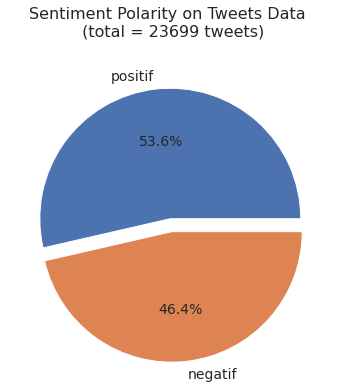

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['label'].value_counts()]
labels = list(data['label'].value_counts().index)
x = ( 0 , 0.1)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = x, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
# pd.set_option('display.max_colwidth', 1000)
# positive_tweets = data[data['label'] == 'positif']
# positive_tweets = data[['text_clean', , 'label']].sort_values(by = 'polarity', ascending=False).reset_index(drop = True)
# positive_tweets.index += 1
# positive_tweets[0:10]

In [ ]:
# pd.set_option('display.max_colwidth', 3000)
# negative_tweets = data[data['label'] == 'negative']
# negative_tweets = negative_tweets[['text_clean', 'polarity', 'label']].sort_values(by = 'polarity', ascending=True)[0:10].reset_index(drop = True)
# negative_tweets.index += 1
# negative_tweets[0:10]

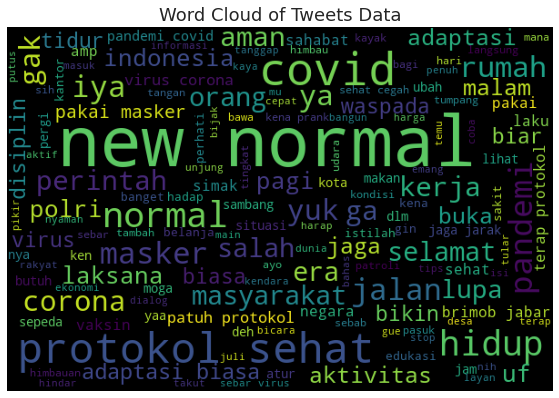

In [ ]:
# Visualize word cloud

list_words=''
for tweet in data['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

# UP


In [ ]:
# data = pd.read_csv('/content/drive/My Drive/dataskrip/barujoinnew.csv')
# # data = data[['tweet','label']]
# # # data.to_csv('/content/drive/MyDrive/isi.csv')
# data

# *TF-IDF* (Term Frequency dan Inverse Document Frequency) 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# threshold
tfidf = TfidfVectorizer(max_features=66,stop_words=stopwords.words('indonesian'))
# data_vec = tfidf.fit_transform(data.tweet_join).toarray()
# # fit and transform
bow = tfidf.fit_transform(
  list(data['tweet_join'])
)
# hasil ditampung pada dataset baru
data_vec = pd.DataFrame(
  bow.toarray(),
  columns = list(tfidf.get_feature_names()))  
data_vec



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,adaptasi,aktivitas,aman,amp,atur,bhabinkamtibmas,biar,bikin,brimob,buka,cegah,corona,covid,desa,disiplin,era,from,ga,gak,hidup,indonesia,iya,jabar,jaga,jalan,kena,kerja,laksana,laku,lihat,lupa,malam,masker,masyarakat,negara,new,normal,orang,pagi,pakai,pandemi,patuh,perintah,polri,protokol,rumah,sahabat,salah,sambang,sebar,sehat,selamat,sepeda,simak,tangan,terap,the,tidur,tular,uf,vaksin,virus,waspada,ya,yaa,yuk
0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.393204,0.0,0.0,0.0,0.0,0.0,0.0,0.416301,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.351887,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.362557,0.446606,0.0,0.466213,0.0
2,0.45012,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.350268,0.0,0.0,0.0,0.0,0.000000,0.0,0.444960,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.473414,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.502587,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.789518,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.613727,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.00000,0.0,0.870565,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.287998,0.277525,0.0,0.0,0.0,0.000000,0.0,0.286625,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.384856,0.370861,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.845191,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
386,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.684555,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.602701,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.295264,0.284527,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
387,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.720078,0.693893,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
388,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.720078,0.693893,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [ ]:
data_vec.shape

(390, 69)

In [ ]:
# terms = tfidf.get_feature_names()

# # tfidf_mat = tfidf.fit_transform(data["tweet_join"]).toarray()

# #sum tfidf frequency of each term through documents
# sums = data_vec.sum(axis=0)

# #connecting term to its sums frequency
# data = []
# for col, term in enumerate(terms):
#     data.append((term, sums[col] ))

# ranking = pd.DataFrame(data, columns=['term','rank'])
# print_rank = ranking.sort_values('rank', ascending=False)
# print_rank.to_csv('/content/drive/MyDrive/dataskrip/rank.csv')
# print_rank

In [ ]:
# # function to collect hashtags
# def hashtag_extract(text_list):
#     hashtags = []
#     # Loop over the words in the tweet
#     for text in text_list:
#         ht = re.findall(r"#(\w+)", text)
#         hashtags.append(ht)

#     return hashtags

# def generate_hashtag_freqdist(hashtags):
#     a = nltk.FreqDist(hashtags)
#     d = pd.DataFrame({'Hashtag': list(a.keys()),
#                       'Count': list(a.values())})
#     # selecting top 15 most frequent hashtags  
#     d = d.nlargest(columns="Count", n = 25)
#     plt.figure(figsize=(16,7))
#     ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
#     plt.xticks(rotation=80)
#     ax.set(ylabel = 'Count')
#     plt.show()
    

In [ ]:
# hashtags = hashtag_extract(data['tweet_join'])
# hashtags = sum(hashtags, [])

# Random Forest


In [ ]:
!pwd

/content


In [ ]:
!cp /content/drive/MyDrive/programScript/random_forest.py /content
!ls


drive  random_forest.py  sample_data


In [ ]:
from random_forest import *

In [ ]:
label_encoder = LabelEncoder() 
data['label']= label_encoder.fit_transform(data['label'])

X = data_vec.values
# X = data_vec.values
y = data['label'].values
# y = data_vec.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.4, random_state =None)

# data['label'].value_counts()
y_train

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
import time
classifier = RandomForest(bagging_rate=0.8,
                          feature_rate=0.8,
                          num_trees=20, 
                          max_depth=10, 
                          impurity_thresh=0.01)
classifier.fit(X_train,y_train)

y_train_hat = classifier.predict(X_train)
y_validation_hat = classifier.predict(X_test)

train_acc = sum(y_train==y_train_hat) / len(y_train_hat)
valid_acc = sum(y_test==y_validation_hat) / len(y_validation_hat)

start_time = time.time()
print ("Training a random forest classifier, please wait..")

print("train accuracy: ", train_acc)
print("validation accuracy: ", valid_acc)
print("--- %s seconds ---" % (time.time() - start_time))

# print("--- Time taken to train a random forest classifier is %s seconds ---" % (time.time() - start_time))


Training a random forest classifier, please wait..
train accuracy:  0.8760683760683761
validation accuracy:  0.7948717948717948
--- 0.0013074874877929688 seconds ---


In [ ]:
pred = classifier.predict(X_test)

print(metrics.classification_report(pred,y_test))
print(metrics.confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.64      0.84      0.73        64
         1.0       0.86      0.67      0.76        92

    accuracy                           0.74       156
   macro avg       0.75      0.76      0.74       156
weighted avg       0.77      0.74      0.75       156

[[54 10]
 [30 62]]


Model Accuracy on Test Data: 76.28205128205127


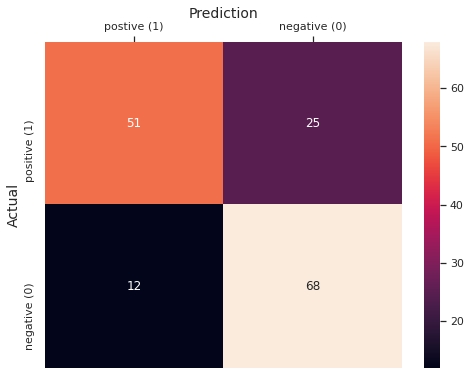

0 - 1.0
0 - 0.0
1 - 1.0
0 - 1.0
1 - 1.0
0 - 1.0
0 - 1.0
1 - 1.0
0 - 0.0
0 - 0.0
1 - 0.0
0 - 0.0
0 - 1.0
1 - 1.0
1 - 1.0
0 - 0.0
1 - 1.0
1 - 1.0
0 - 0.0
0 - 1.0
1 - 0.0
1 - 1.0
0 - 0.0
0 - 0.0
1 - 1.0
1 - 1.0
0 - 0.0
1 - 0.0
1 - 0.0
1 - 1.0
0 - 1.0
1 - 1.0
1 - 0.0
1 - 1.0
1 - 0.0
0 - 0.0
0 - 0.0
0 - 0.0
0 - 0.0
0 - 1.0
0 - 0.0
0 - 0.0
1 - 0.0
1 - 1.0
0 - 1.0
0 - 1.0
0 - 0.0
1 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
0 - 0.0
1 - 1.0
0 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
0 - 1.0
1 - 1.0
1 - 0.0
1 - 1.0
0 - 0.0
0 - 0.0
1 - 0.0
1 - 1.0
0 - 0.0
1 - 1.0
1 - 0.0
0 - 0.0
0 - 0.0
0 - 0.0
1 - 1.0
1 - 1.0
0 - 0.0
1 - 1.0
1 - 1.0
0 - 0.0
1 - 1.0
0 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
0 - 0.0
0 - 0.0
1 - 1.0
1 - 1.0
1 - 1.0
0 - 0.0
0 - 0.0
1 - 1.0
0 - 1.0
0 - 1.0
0 - 0.0
1 - 1.0
0 - 0.0
0 - 0.0
1 - 1.0
0 - 0.0
0 - 1.0
1 - 1.0
0 - 0.0
1 - 1.0
0 - 1.0
0 - 1.0
1 - 0.0
0 - 0.0
1 - 1.0
0 - 1.0
0 - 1.0
1 - 1.0
0 - 0.0
0 - 1.0
0 - 0.0
1 - 1.0
1 - 1.0
1 - 1.0
1 - 1.0
0 - 1.0
1 - 0.0
1 - 1.0
0 - 0.0


In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', 100*accuracy)
confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels([ 'postive (1)','negative (0)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['positive (1)','negative (0)' ])
plt.show()

z = 0
while z < len(y_pred):
    print(y_test[z], "-", y_pred[z])
    z+=1

In [ ]:
# test = pd.DataFrame(X_test)
# hasil = pd.DataFrame({'Analysis':pred})
# test = test.reset_index()
# test = test.iloc[:,-600:]
# hasil_sentimen = pd.concat([test,hasil],axis=1)
# hasil_sentimen = hasil_sentimen.rename(columns={'tweet':'tweet'})
# hasil_sentimen

In [ ]:
#Compare time taken and accuracy with different techniques to select max_features

clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy')
start_time = time.time()
clf.fit(X,y)
print (clf.score(X_test,y_test))
print("--- Time taken to train a random forest classifier with max features=sqrt is %s seconds ---" % (time.time() - start_time))

predikcld = clf.predict(X_test)
accuracy = accuracy_score(y_test, predikcld)
print('Model Accuracy on Test Data:', 100*accuracy)
print (classification_report(y_test,predikcld))
print (confusion_matrix(y_test,predikcld))

z = 0
while z < len(predikcld):
    print(y_test[z], "-", predikcld[z])
    z+=1

0.8717948717948718
--- Time taken to train a random forest classifier with max features=sqrt is 0.17392730712890625 seconds ---
Model Accuracy on Test Data: 87.17948717948718
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        74
           1       0.83      0.95      0.89        82

    accuracy                           0.87       156
   macro avg       0.88      0.87      0.87       156
weighted avg       0.88      0.87      0.87       156

[[58 16]
 [ 4 78]]
0 - 0
1 - 1
1 - 1
1 - 1
0 - 0
1 - 1
0 - 1
1 - 1
0 - 1
0 - 0
1 - 1
0 - 1
0 - 0
1 - 1
1 - 1
1 - 1
1 - 1
1 - 1
0 - 0
1 - 1
1 - 1
1 - 1
0 - 0
0 - 0
0 - 0
1 - 1
1 - 1
0 - 0
1 - 1
1 - 1
0 - 0
1 - 1
1 - 0
0 - 0
0 - 0
0 - 1
1 - 1
0 - 0
1 - 0
0 - 0
1 - 1
1 - 1
1 - 1
0 - 0
1 - 1
1 - 1
0 - 0
1 - 1
0 - 0
0 - 0
1 - 1
1 - 1
0 - 1
1 - 1
0 - 1
0 - 0
0 - 0
0 - 1
1 - 1
0 - 0
0 - 1
0 - 0
0 - 0
1 - 1
0 - 0
0 - 0
0 - 0
1 - 1
1 - 1
1 - 1
1 - 1
0 - 1
0 - 0
0 - 0
1 - 1
1 - 1
1 - 1
0 - 1
0 - 0
0 - 0

In [ ]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=10, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1867220622, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=10, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1162972224, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=1

In [ ]:
clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

[Text(687.5357142857142, 518.8909090909091, 'X[646] <= 0.1\nentropy = 0.998\nsamples = 235\nvalue = [184, 206]'),
 Text(647.6785714285713, 469.4727272727273, 'X[512] <= 0.085\nentropy = 1.0\nsamples = 229\nvalue = [184, 193]'),
 Text(607.8214285714286, 420.05454545454546, 'X[549] <= 0.091\nentropy = 0.998\nsamples = 212\nvalue = [184, 167]'),
 Text(567.9642857142857, 370.6363636363636, 'X[591] <= 0.125\nentropy = 0.996\nsamples = 207\nvalue = [184, 159]'),
 Text(378.6428571428571, 321.21818181818185, 'X[557] <= 0.074\nentropy = 0.99\nsamples = 199\nvalue = [182, 144]'),
 Text(338.7857142857143, 271.8, 'X[106] <= 0.066\nentropy = 0.977\nsamples = 191\nvalue = [182, 127]'),
 Text(239.1428571428571, 222.38181818181818, 'X[388] <= 0.235\nentropy = 0.952\nsamples = 166\nvalue = [161, 95]'),
 Text(199.28571428571428, 172.96363636363634, 'X[329] <= 0.083\nentropy = 0.935\nsamples = 162\nvalue = [161, 87]'),
 Text(119.57142857142856, 123.54545454545456, 'X[51] <= 0.134\nentropy = 0.962\nsample

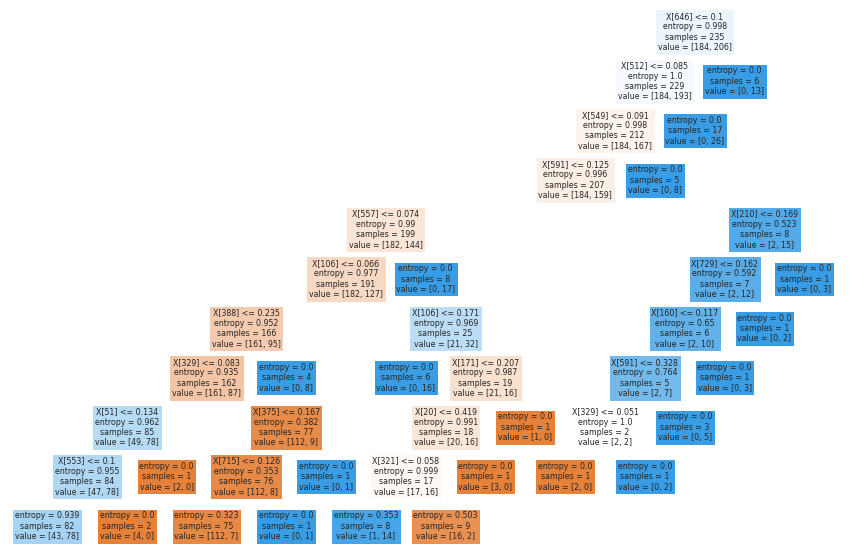

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[2],filled=True)

In [ ]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.accuracy_score(y, preds)

In [ ]:
from sklearn import model_selection, metrics

n_estimators = [10,20,30,40,50, 100, 200]  ## try different n_estimators
cv_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    acc = model_selection.cross_val_score(rf, X, y, cv=5, scoring=scorer)
    cv_results.append(acc.mean())

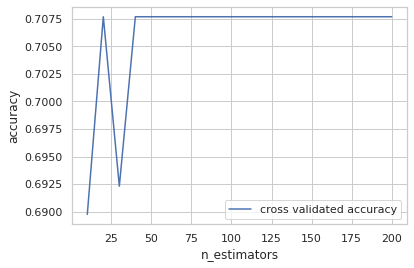

In [ ]:
line1= plt.plot(n_estimators, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

In [ ]:
best_n_estimators = n_estimators[cv_results.index(max(cv_results))]
print ("best_n_estimators: ", best_n_estimators)
print ("best accuracy: ", max(cv_results))

best_n_estimators:  40
best accuracy:  0.7076923076923077


In [ ]:
cv_results = []
max_depths = np.linspace(1, 32, 32, endpoint=True)  ## try different max_depths
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=max_depth)
    acc = model_selection.cross_val_score(rf, X, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

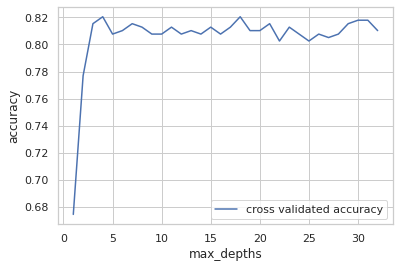

In [ ]:
line1= plt.plot(max_depths, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depths')
plt.legend()
plt.show()

In [ ]:
best_max_depths = max_depths[cv_results.index(max(cv_results))]
print ("best_max_depths:", best_max_depths)
print ("best accuracy: ", max(cv_results))

best_max_depths: 4.0
best accuracy:  0.8205128205128205


In [ ]:
cv_results = []
min_samples_splits = [2,3,5,10,20,30,40,50,60,70,80]  ## try different min_samples_splits
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=min_samples_split)
    acc = model_selection.cross_val_score(rf, X, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

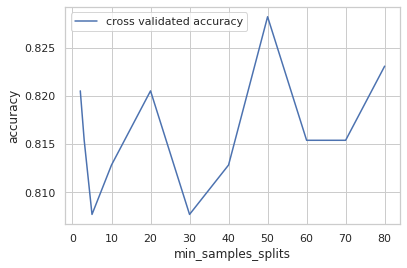

In [ ]:
line1= plt.plot(min_samples_splits, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_splits')
plt.legend()
plt.show()

In [ ]:
best_min_samples_splits = min_samples_splits[cv_results.index(max(cv_results))]
print ("best_min_samples_splits: ", best_min_samples_splits)
print ("best accuracy", max(cv_results))

best_min_samples_splits:  50
best accuracy 0.8282051282051283


In [ ]:
rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=best_min_samples_splits)
rf.fit(X, y)
train_pred = rf.predict(X)
print ("Training acc:", accuracy_score(y, train_pred))
y_pred = rf.predict(X_test)
print ("Testing acc:", accuracy_score(y_test, y_pred))

Training acc: 0.8256410256410256
Testing acc: 0.8525641025641025


In [ ]:
text_clean = data['tweet_join']
text_train, text_test = train_test_split(text_clean, test_size = 0.2, random_state = 0)
result_test = pd.DataFrame(data = zip(text_test, pred), columns = ['tweet', 'polarity'])
polarity_decode = {0 : 'Negative', 1 : 'Positive'}
result_test['polarity'] = result_test['polarity'].map(polarity_decode)
pd.set_option('max_colwidth', 300)
result_test.to_csv('hasil.csv')
result_test

,tweet,polarity
0,bhabinkamtibmas aiptu erik yunizar sambang tokoh pemuda sdr ade rangka silaturahmi aman tertib masyarakat jelang pilih kepala daerah serentak himbau covid polri,Positive
1,pakai granat tertawa,Positive
2,bahas new normal pasca covid manusia newtype dekat setsuna f seiei tieria erde konspirasi,Positive
3,adaptasi biasa ptpn vii aktif senam ptpn,Positive
4,ohh putus pilihanjalan new normal wdyt,Positive
...,...,...
73,patroli panic buying brimob jabar belanja wilayah cipanas,Positive
74,pandemi corona pasang suami istri unik tunjuk langgar atur perintah penasaran simak ya via,Negative
75,tolong harga masker bedah normal harga pandemi box isi pcs atas box isi pcs masker jado butuh hari,Positive
76,pandemi aktivitas sosial benarbenar batas sebab hambat aktifitas butuh temu tatap muka situasi teknologi digital solusi tingkat efisiensi hidup,Positive


# Testing Data


In [ ]:
# Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = [
'Covid merupakan virus yang merugikan atau menguntungkan?',
'Corona adalah virus yang mematikan dan berbahaya',
'Covid bisa sembuh maka harus menjaga protokol kesehatan',
'Kesehatan adalah imun bagi tubuh dan hanya jika kita tidak memakai masker',
'new normal harus pakai masker jika pergi keluar','kesehatan adalah harga mati pada saat pandemi ini',
                     'Pendemi blum brakhir qta hrus membiasakan hidu...	',
                     'new normal hidup sehat',
                     'The new Normal Life, berdamai dengan #Covid-19 bukan berarti menyerah, pahami dulu, check it out! #indonesia #berdamaidengancovid19 #corona pic.twitter.com/79DFdt5CoP	',
                     'Alhamdulillah sehat aman nyaman, beradaptasi dengan new normal mas yo, semoga segalanya membaik seperti semula...aamiin	',
                     'Fans apaan. Yg ada aku jadi secret admirer *loh wkwkwk Skrng udah ada new normal bed hiks	',
                     'KEBIASAAN BANGET SIH ANNOUNCER BOJONGGEDE ENGGAk NGASIH TAU KERETA YANG DATANG BERAPA RANGKAIAN?!! SESUSAH ITU YA CUMA NGASIH TAU DOANG T*I BAT CAPE ORG LARI-LARI @CommuterLine @CurhatKRL',]


In [ ]:
slang_words = {"wfh":"work from home","Yg":"yang","@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah",
               "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", 
               "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo",
               "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", 
               "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", 
               "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam",
               "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu",
               "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan","blum":"belum","brakhir":"berakhir",
               "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi",
               "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", 
               "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", 
               "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang",
               "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental",
               "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan",
               "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah",
               "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", 
               "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru",
               "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia",
               "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat",
               "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar",
               "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", 
               "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat",
               "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", 
               "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep",
               "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci",
               "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat","qta" :"kita", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
 
otherData['fix_slang'] = otherData['text'].apply(lambda x: ' '.join(slang_words.get(word, word) for word in x.split()))
otherData.head()
# tweets.loc[:,['fix_slang']]

,text,fix_slang
0,Covid merupakan virus yang merugikan atau meng...,Covid merupakan virus yang merugikan atau meng...
1,Corona adalah virus yang mematikan dan berbahaya,Corona adalah virus yang mematikan dan berbahaya
2,Covid bisa sembuh maka harus menjaga protokol ...,Covid bisa sembuh maka harus menjaga protokol ...
3,Kesehatan adalah imun bagi tubuh dan hanya jik...,Kesehatan adalah imun bagi tubuh dan hanya jik...
4,new normal harus pakai masker jika pergi keluar,new normal harus pakai masker jika pergi keluar


In [ ]:

otherData['text_clean'] = otherData['fix_slang'].apply(cleaningText)
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['fix_slang'], axis = 1, inplace = True)

otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
# otherData

X_otherData = otherData['text_preprocessed'].apply(toSentence)
 
# max_features = 5000
# tokenizer = Tokenizer(num_words=max_features, split=' ')
# tokenizer.fit_on_texts(X_otherData.values)
# X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
# X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
# X_otherData

import ast

def join_text_list(texts):
    texts = ast.literal_eval(str(texts))
    return ' '.join([text for text in texts])
otherData["tweet_join"] = otherData["text_preprocessed"].apply(join_text_list)
X_otherData = otherData


In [ ]:
X_otherData = otherData['text_preprocessed'].apply(toSentence)
import ast

def join_text_list(texts):
    texts = ast.literal_eval(str(texts))
    return ' '.join([text for text in texts])
otherData["tweet_join"] = otherData["text_preprocessed"].apply(join_text_list)
X_otherData = otherData
X_otherData

,text,text_clean,text_preprocessed,tweet_join
0,Covid merupakan virus yang merugikan atau meng...,covid merupakan virus yang merugikan atau meng...,"[covid, virus, rugi, untung]",covid virus rugi untung
1,Corona adalah virus yang mematikan dan berbahaya,corona adalah virus yang mematikan dan berbahaya,"[corona, virus, mati, bahaya]",corona virus mati bahaya
2,Covid bisa sembuh maka harus menjaga protokol ...,covid bisa sembuh maka harus menjaga protokol ...,"[covid, sembuh, jaga, protokol, sehat]",covid sembuh jaga protokol sehat
3,Kesehatan adalah imun bagi tubuh dan hanya jik...,kesehatan adalah imun bagi tubuh dan hanya jik...,"[sehat, imun, tubuh, pakai, masker]",sehat imun tubuh pakai masker
4,new normal harus pakai masker jika pergi keluar,new normal harus pakai masker jika pergi keluar,"[new, normal, pakai, masker, pergi]",new normal pakai masker pergi
5,kesehatan adalah harga mati pada saat pandemi ini,kesehatan adalah harga mati pada saat pandemi ini,"[sehat, harga, mati, pandemi]",sehat harga mati pandemi
6,Pendemi blum brakhir qta hrus membiasakan hidu...,pendemi belum berakhir kita harus membiasakan ...,"[demi, biasa, hidu]",demi biasa hidu
7,new normal hidup sehat,new normal hidup sehat,"[new, normal, hidup, sehat]",new normal hidup sehat
8,"The new Normal Life, berdamai dengan #Covid-19...",the new normal life berdamai dengan bukan ber...,"[the, new, normal, life, damai, serah, paham, ...",the new normal life damai serah paham check it...
9,"Alhamdulillah sehat aman nyaman, beradaptasi d...",alhamdulillah sehat aman nyaman beradaptasi de...,"[alhamdulillah, sehat, aman, nyaman, adaptasi,...",alhamdulillah sehat aman nyaman adaptasi new n...


In [ ]:
# X_otherData["subjectivity"] = X_otherData["text_preprocessed"].apply(lambda x: getSub(' '.join(x)))
# X_otherData["polarity"] = X_otherData["text_preprocessed"].apply(lambda x: getPol(' '.join(x)))
# X_otherData["label"] = X_otherData["polarity"].apply(getAnalysis)
# print(X_otherData['label'].value_counts())
# X_otherData

In [ ]:
vect =TfidfVectorizer(max_features=200)

bow = vect.fit_transform(list(X_otherData.tweet_join))

# hasil ditampung pada dataset baru
data_vec_pre = pd.DataFrame(
  bow.toarray(),
  columns = list(vect.get_feature_names()))  

data_vec_pre.shape

# bow_model = CountVectorizer(ngram_range=(1,2), min_df=0.0025)
# bow_model.fit(X_otherData.tweet_join)
# df_vect = pd.DataFrame(bow_model.transform(X_otherData.tweet_join).toarray(), columns=bow_model.get_feature_names())

# df_vect

(12, 66)

In [ ]:
# Results from prediction sentiment on text data

datatest = data_vec_pre.values

# prediksi = forest.predict(data_vec_pre.values)
# otherData['Result Prediction'] = prediksi

# polarity_decode = {0 : 'Negative', 1  : 'Positive'}
# otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
# otherData

preds = clf.predict(datatest)
otherData['Result Prediction'] = preds

polarity_decode = {0 : 'Negative', 1  : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
# otherData.to_csv('/content/drive/MyDrive/hasil.csv')
otherData

,text,text_clean,text_preprocessed,tweet_join,Result Prediction
0,Covid merupakan virus yang merugikan atau meng...,covid merupakan virus yang merugikan atau meng...,"[covid, virus, rugi, untung]",covid virus rugi untung,Positive
1,Corona adalah virus yang mematikan dan berbahaya,corona adalah virus yang mematikan dan berbahaya,"[corona, virus, mati, bahaya]",corona virus mati bahaya,Positive
2,Covid bisa sembuh maka harus menjaga protokol ...,covid bisa sembuh maka harus menjaga protokol ...,"[covid, sembuh, jaga, protokol, sehat]",covid sembuh jaga protokol sehat,Positive
3,Kesehatan adalah imun bagi tubuh dan hanya jik...,kesehatan adalah imun bagi tubuh dan hanya jik...,"[sehat, imun, tubuh, pakai, masker]",sehat imun tubuh pakai masker,Positive
4,new normal harus pakai masker jika pergi keluar,new normal harus pakai masker jika pergi keluar,"[new, normal, pakai, masker, pergi]",new normal pakai masker pergi,Negative
5,kesehatan adalah harga mati pada saat pandemi ini,kesehatan adalah harga mati pada saat pandemi ini,"[sehat, harga, mati, pandemi]",sehat harga mati pandemi,Positive
6,Pendemi blum brakhir qta hrus membiasakan hidu...,pendemi belum berakhir kita harus membiasakan ...,"[demi, biasa, hidu]",demi biasa hidu,Positive
7,new normal hidup sehat,new normal hidup sehat,"[new, normal, hidup, sehat]",new normal hidup sehat,Positive
8,"The new Normal Life, berdamai dengan #Covid-19...",the new normal life berdamai dengan bukan ber...,"[the, new, normal, life, damai, serah, paham, ...",the new normal life damai serah paham check it...,Negative
9,"Alhamdulillah sehat aman nyaman, beradaptasi d...",alhamdulillah sehat aman nyaman beradaptasi de...,"[alhamdulillah, sehat, aman, nyaman, adaptasi,...",alhamdulillah sehat aman nyaman adaptasi new n...,Positive
